M. Amintoosi

# Pruning deep neural networks to make them fast and small

https://jacobgil.github.io/deeplearning/pruning-deep-learning

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHZO6XMw2CwMXFZeJ4jQ161PCAcDWB-bX5kiS8VX0IZOGPWfIAGNuc
Mounted at /content/drive


In [2]:
import os, shutil
from os import listdir
from os.path import isfile, join
from pathlib import Path
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import time
from time import strftime
import datetime
import importlib

In [3]:
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary
import pickle
from torchvision import models

In [4]:
MAT_web_dir = '/content/drive/My Drive/onlyOnWeb/'
datasets_dir = MAT_web_dir + 'datasets/'
model_web_dir = MAT_web_dir + "models/"
local_output_dir = '/content/drive/My Drive/codes/Sparse/pytorch-pruning/doc/output'
base_dir ='/content/drive/My Drive/codes/Sparse/pytorch-pruning/'
data_dir = '/content/data'
Path(MAT_web_dir).mkdir(parents=True, exist_ok=True)
Path(local_output_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

In [5]:
# os.chdir(data_dir)
# !unzip -q /content/drive/My\ Drive/codes/Sparse/pytorch-pruning/data/painting.zip

In [5]:
os.chdir(base_dir)

In [16]:
%%time
%run finetune.py --train --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Using CUDA...
Epoch:  0 / 15
Test starts...
Accuracy : 0.546875
Epoch:  1 / 15
Test starts...
Accuracy : 0.5
Epoch:  2 / 15
Test starts...
Accuracy : 0.53125
Epoch:  3 / 15
Test starts...
Accuracy : 0.59375
Epoch:  4 / 15
Test starts...
Accuracy : 0.6875
Epoch:  5 / 15
Test starts...
Accuracy : 0.8125
Epoch:  6 / 15
Test starts...
Accuracy : 0.859375
Epoch:  7 / 15
Test starts...
Accuracy : 0.875
Epoch:  8 / 15
Test starts...
Accuracy : 0.875
Epoch:  9 / 15
Test starts...
Accuracy : 0.875
Epoch:  10 / 15
Test starts...
Accuracy : 0.875
Epoch:  11 / 15
Test starts...
Accuracy : 0.90625
Epoch:  12 / 15
Test starts...
Accuracy : 0.90625
Epoch:  13 / 15
Test starts...
Accuracy : 0.90625
Epoch:  14 / 15
Test starts...
Accuracy : 0.921875
Finished fine tuning.
ModifiedVGG16Model(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReL

In [12]:
%%time
%run finetune.py --prune --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Using CUDA...
Accuracy : 0.921875
Number of prunning iterations to reduce 95% filters 7
Iter:  0 / 7
Ranking filters.. 
Layers that will be prunned {21: 67, 14: 25, 12: 11, 7: 10, 28: 126, 26: 61, 10: 15, 24: 81, 19: 37, 17: 68, 0: 4, 5: 3, 2: 4}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.96875
Fine tuning to recover from prunning iteration.
Epoch:  0 / 10
Accuracy : 1.0
Epoch:  1 / 10
Accuracy : 0.953125
Epoch:  2 / 10
Accuracy : 1.0
Epoch:  3 / 10
Accuracy : 1.0
Epoch:  4 / 10
Accuracy : 1.0
Epoch:  5 / 10
Accuracy : 1.0
Epoch:  6 / 10
Accuracy : 0.984375
Epoch:  7 / 10
Accuracy : 1.0
Epoch:  8 / 10
Accuracy : 1.0
Epoch:  9 / 10
Accuracy : 0.984375
Finished fine tuning.
Iter:  1 / 7
Ranking filters.. 
Layers that will be prunned {21: 61, 28: 162, 14: 12, 26: 88, 24: 73, 19: 42, 7: 7, 17: 29, 12: 14, 10: 17, 0: 2, 5: 5}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.984375
Fine tuning to recover from prunning iteration.
Epoch:  0 / 10
Acc

In [13]:
%run finetune.py --test --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Accuracy : 0.96875
ModifiedVGG16Model(
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1470, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=2, bias=True)
  )
  (features): Sequential(
    (0): Conv2d(3, 22, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(22, 29, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(29, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(48, 39, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

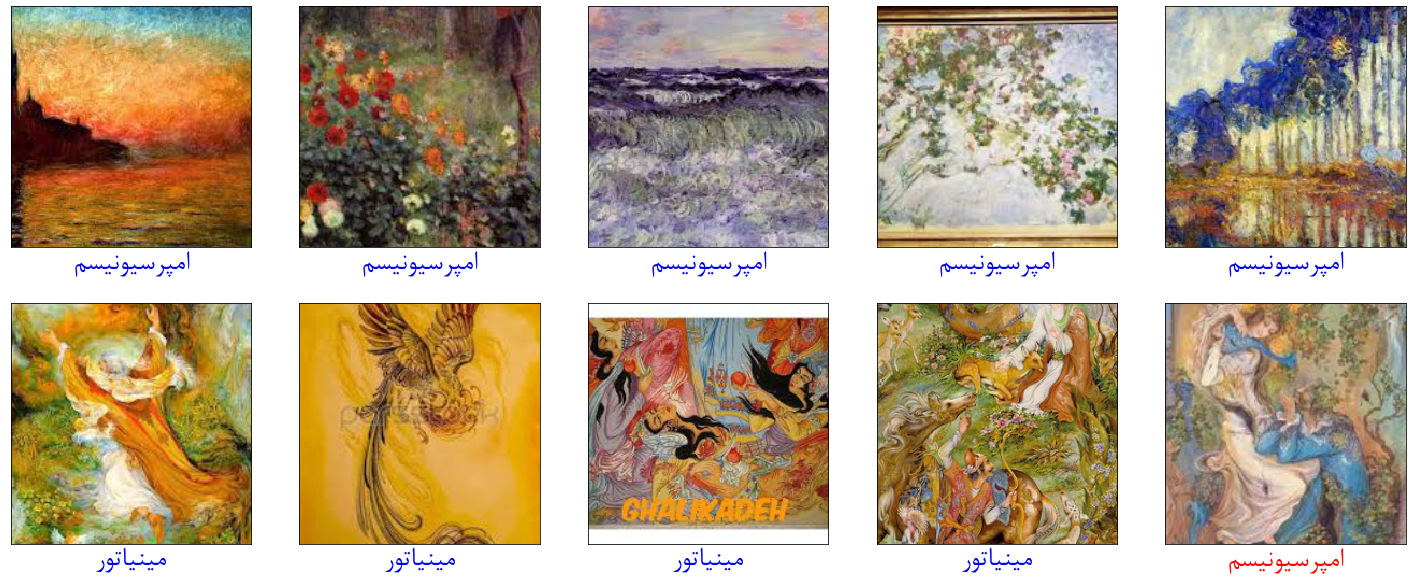

Accuracy : 0.9


In [29]:
%run finetune.py --test --train_path data/painting/train --test_path data/painting/test